#### Importing importand libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
data2 = pd.read_csv('spend_hp_data_2.csv')
data2.shape

(266304, 22)

In [141]:
y = data2[['$ Spend']]
X = data2[['Perf']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.13787939204266753
Test Score for Linear Regression: 0.14091987316567844


In [142]:
X = data2[['$ Spend']]
y = data2[['Perf']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.13787939204266764
Test Score for Linear Regression: 0.14106920321616567


In [143]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266304 entries, 0 to 266303
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                266304 non-null  object 
 1   Campaign ID         266304 non-null  int64  
 2   Campaign Goal Code  266304 non-null  object 
 3   Campaign Ad ID      266304 non-null  int64  
 4   Ad Digital Channel  266304 non-null  object 
 5   Ad channel partner  266304 non-null  object 
 6   Ad Device           266304 non-null  object 
 7   Ad Group            266304 non-null  object 
 8   Ad Content Type     266304 non-null  object 
 9   Audience Type       266304 non-null  object 
 10  $ Spend             266304 non-null  int64  
 11  # Impressions       266304 non-null  int64  
 12  # Clicks            266304 non-null  int64  
 13  # Video Completes   266304 non-null  int64  
 14  # Social Likes      266304 non-null  int64  
 15  # Social Shares     266304 non-nul

In [144]:
data2.drop(data2.columns[[0,1,3,5,6,7,8,11,12,13,14,15,16,17,18,19,20]], axis = 1, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266304 entries, 0 to 266303
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Campaign Goal Code  266304 non-null  object 
 1   Ad Digital Channel  266304 non-null  object 
 2   Audience Type       266304 non-null  object 
 3   $ Spend             266304 non-null  int64  
 4   Perf                266304 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.2+ MB


In [145]:
data_final = pd.get_dummies(data2, columns = ['Ad Digital Channel','Audience Type','Campaign Goal Code'])
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266304 entries, 0 to 266303
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   $ Spend                                  266304 non-null  int64  
 1   Perf                                     266304 non-null  float64
 2   Ad Digital Channel_Programmatic Display  266304 non-null  uint8  
 3   Ad Digital Channel_Search                266304 non-null  uint8  
 4   Ad Digital Channel_Social                266304 non-null  uint8  
 5   Audience Type_Audience Type 1            266304 non-null  uint8  
 6   Audience Type_Audience Type 2            266304 non-null  uint8  
 7   Audience Type_Audience Type 3            266304 non-null  uint8  
 8   Audience Type_Audience Type 4            266304 non-null  uint8  
 9   Audience Type_Audience Type 5            266304 non-null  uint8  
 10  Campaign Goal Code_Awareness    

In [146]:
y = data_final['Perf']
X = data_final.drop('Perf', axis = 1)

In [147]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Perf   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7207.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:25:22   Log-Likelihood:            -2.6856e+06
No. Observations:              266304   AIC:                         5.371e+06
Df Residuals:                  266292   BIC:                         5.371e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [148]:
data2 = pd.read_csv('spend_hp_data_2.csv')
data2.shape

(266304, 22)

In [149]:
data = data2[data2['Perf']>0]
data.shape

(265388, 22)

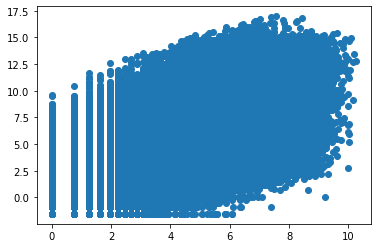

In [150]:
from scipy import stats
X = data['$ Spend']
y = data['Perf']
y,_ = stats.boxcox(y)
X,_ = stats.boxcox(X)

y = pd.DataFrame({'Perf':y})
X = pd.DataFrame({'$ Spend':X})
plt.scatter(X,y)

In [151]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Perf   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                 1.819e+05
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:25:46   Log-Likelihood:            -6.1251e+05
No. Observations:              265388   AIC:                         1.225e+06
Df Residuals:                  265386   BIC:                         1.225e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0635      0.009    322.947      0.0

In [152]:
data.drop(data.columns[[0,1,2,3,5,6,7,8,11,12,13,14,15,16,17,18,19,20]], axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265388 entries, 0 to 266303
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Ad Digital Channel  265388 non-null  object 
 1   Audience Type       265388 non-null  object 
 2   $ Spend             265388 non-null  int64  
 3   Perf                265388 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ MB


/var/folders/q_/dwbhym5j41q1s155dj8tv39r0000gn/T/ipykernel_88476/2585581193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.columns[[0,1,2,3,5,6,7,8,11,12,13,14,15,16,17,18,19,20]], axis = 1, inplace=True)


In [153]:
df = pd.DataFrame({'Ad Digital Channel':data['Ad Digital Channel'].values,
                   'Audience Type':data['Audience Type'].values,'spend':X['$ Spend'].values,
                  'Perf':data['Perf'].values})
df.head()

,Ad Digital Channel,Audience Type,spend,Perf
0,Search,Audience Type 1,4.822978,55.004942
1,Search,Audience Type 1,3.060041,6.261748
2,Search,Audience Type 1,2.880727,106.838661
3,Search,Audience Type 1,2.230852,12.932054
4,Social,Audience Type 2,3.381082,33.822295


In [154]:
data_final = pd.get_dummies(df, columns = ['Ad Digital Channel','Audience Type'])
data_final.head()

,spend,Perf,Ad Digital Channel_Programmatic Display,Ad Digital Channel_Search,Ad Digital Channel_Social,Audience Type_Audience Type 1,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
0,4.822978,55.004942,0,1,0,1,0,0,0,0
1,3.060041,6.261748,0,1,0,1,0,0,0,0
2,2.880727,106.838661,0,1,0,1,0,0,0,0
3,2.230852,12.932054,0,1,0,1,0,0,0,0
4,3.381082,33.822295,0,0,1,0,1,0,0,0


In [155]:
data_final.tail()

,spend,Perf,Ad Digital Channel_Programmatic Display,Ad Digital Channel_Search,Ad Digital Channel_Social,Audience Type_Audience Type 1,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
265383,3.381082,59.868782,0,1,0,1,0,0,0,0
265384,4.254370,38.224923,0,1,0,1,0,0,0,0
265385,5.572371,4729.152627,1,0,0,0,0,1,0,0
265386,6.724119,879.180709,1,0,0,0,0,0,0,1
265387,1.640360,107.037615,1,0,0,0,0,1,0,0


In [156]:
y = data_final['Perf']
X = data_final.drop('Perf', axis = 1)


In [157]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.20229655130004798
Test Score for Linear Regression: 0.20865471982966655


In [158]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Perf   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     8492.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:26:42   Log-Likelihood:            -2.6811e+06
No. Observations:              265388   AIC:                         5.362e+06
Df Residuals:                  265379   BIC:                         5.362e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [58]:

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.5711765496854114
Test Score for Linear Regression: 0.572260414903272


In [66]:
lreg.coef_

array([ 9.44080499e-01, -9.92759993e+11, -9.92759993e+11, -9.92759993e+11,
       -2.65371998e+11, -2.65371998e+11, -2.65371998e+11, -2.65371998e+11,
       -2.65371998e+11])

In [59]:
#Ridge(random_state = 0)
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 0)
ridge.fit(X_train, y_train)

print('Train Score for Ridge Regression:', ridge.score(X_train, y_train))
print('Test Score for Ridge Regression:', ridge.score(X_test, y_test))



Train Score for Ridge Regression: 0.5711805756621504
Test Score for Ridge Regression: 0.5722602672501352


In [60]:
#Lasso(random_state = 0)
from sklearn.linear_model import Lasso

lasso = Lasso(random_state= 0)
lasso.fit(X_train, y_train)

print('Train Score for Lasso Regression:', lasso.score(X_train, y_train))
print('Test Score for Lasso Regression:', lasso.score(X_test, y_test))

Train Score for Lasso Regression: 0.3876162866275654
Test Score for Lasso Regression: 0.38754077159840117


In [61]:
#DecisionTreeRegressor(max_depth = 2, random_state= 0)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth = 2, random_state= 0)
dr.fit(X_train, y_train)

print('Train Score for Decision Tree Regression:', dr.score(X_train, y_train))
print('Test Score for Decision Tree Regression:', dr.score(X_test, y_test))

Train Score for Decision Tree Regression: 0.442486396123803
Test Score for Decision Tree Regression: 0.44240560070271984


In [65]:
dr.coef_

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [62]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(X_train, y_train)

# print('Train Score for KNN Regression:', knn.score(X_train, y_train))
# print('Test Score for KNN Regression:', knn.score(X_test, y_test))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)  
# Fitting the model
xgb_r.fit(X_train, y_train)

print('Train Score for XGBoost linear Regression:', xgb_r.score(X_train, y_train))
print('Test Score for XGBoost linear Regression:', xgb_r.score(X_test, y_test))

[17:35:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Train Score for XGBoost linear Regression: 0.6102299681587877
Test Score for XGBoost linear Regression: 0.61090251838468


AttributeError: Coefficients are not defined for Booster type None